<a href="https://colab.research.google.com/github/HerminioSabino/Python_DataSet/blob/master/Eleicao2020_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Rotina para análise da lista de candidatos na eleição 2020 no Rio Grande do Norte

### importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Adicionando o dataset e selecionando apenas as colunas desejadas
df = pd.read_csv("https://raw.githubusercontent.com/HerminioSabino/Python_DataSet/master/Dataset/lista_de_candidatos_-_candidaturas.csv", sep=";",encoding="latin-1")
##df = df[['Cargo','Nome do candidato (urna)']]


In [3]:
vereadores = pd.DataFrame(df[df.Cargo == "Vereador"])


In [5]:
## Transformar o número do candidato em string para usar funções srt
vereadores['Número do candidato'] = vereadores['Número do candidato'].astype('string')

In [6]:
#### Filtrar número com '666' e agrupar por partido
ver = vereadores[vereadores['Número do candidato'].str.contains('666')]
ver_g = ver.groupby(['Partido']).size().reset_index(name='counts')


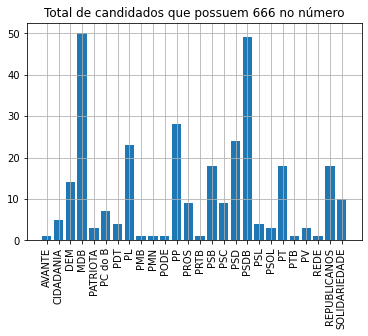

In [7]:
### Plotar o gráfico com os partidos que possuem candidatos com 666
a = ver_g['Partido']
p = ver_g['counts']
plt.bar(a,p)
plt.xticks(rotation=90)
plt.grid(True)
plt.title("Total de candidados que possuem 666 no número")
plt.show()

In [ ]:
## conta a quantidade de candidatos que possuem "IRMÃO" no nome (fantásia)
irmao = pd.DataFrame(vereadores[vereadores['Nome do candidato (urna)'].str.contains('IRMÃO')])
ver_irmao = irmao.groupby(['Partido']).size().reset_index(name='counts')
ver_irmao

In [ ]:
plt.bar(ver_irmao['Partido'], ver_irmao['counts'])
plt.xticks(rotation=90)
plt.grid(True)
plt.title("Total de candidados que possuem 'IRMÃO' no nome (urna)")
plt.show()

In [17]:
dados = pd.DataFrame.empty
dados['dados'] = vereadores[vereadores['Nome do candidato (urna)'].str.contains('CORONEL')]

AttributeError: ignored